# Technical issue disclaimer
For some reason I cannot figure out for the life of me, GitHub does not display this image's notebooks. The notebook renders properly in my local machine. I will apologize for not figuring out what the matter is and ask that you view this notebook on your local machine. There are only 2 lines of code which do not have any dependencies or require a minimum version of Python. All of the pictures included in this dictionary are present in this repository. Simply download the entire depository and open the Notebook on your local machine. I apologize once again for the inconvenience. If any new issues arise or the ones mentioned here are not solved, please do contact me on the provided e-mails (see README.md).

# Part 1: Presentating inference results

We shall start our report by presenting results from the xception_65 model variation, which is the one used in our assignment.

![Cycling 0](img/cycling0.PNG)

In these image showing cyclists holding their bicycles besides them, we see that the model managed to give us great results, separating each part of a human from the bicycle even on image sections where the subjects overlap, and even recognizing the seat of the rightmost bicycle. In addition, the model manages to recognize bicycles no matter their frame type. This could mean that the model has not only been trained on one type of bicycles (for example road bikes), but many other types.

![Cycling 1](img/cycling1.png)
Another great example, where the model managed to distinguish pedestrians even when they were really far away (small sub-image, and not enough details), and recognized the bicycles correctly as well.

![Cycling 2](img/cycling2.png)
Once again the bicycles are separated from their riders in great detail.

![Shibuya](img/shibuya.png)
    Even though some people were not recognized properly (man wearing backpack in the middle with his back turned towards the camera, and man hidden behind pole on the left) this example shows once again that the model does a great job at recognizing human subjects. What is impressive is that not only can it detect people regardless of their clothing and accessories (see woman close to the camera, back turned, wearing scarf and bag strap), but we can see that in the case of the two people on the left of the frame wearing backpacks, the model distinguishes between this accessory and its wearer.

Since this model is great at recognizing human subjects, we were curious as to how it would perform on human (well, almost) anime characters. 
![Neko Cafe](img/nekoCafe.png)
As we can see, the model managed to recognize two subjects on the left, while at the same time highlighting a certain feminime area of the rightmost character. We believe that this specific recognized area is not necessarily a coincidence, as it is possible that the model could have been trained on female subjects, and this characteristic could be one of the way it recognizes humans.

![Puppy and Kitten](img/PuppyAndKitten.png)
Excluding the small portion of the kitten being classified as part of the puppy, this model managed to classify the subjects correctly on this image, while other models (less deep ones) failed to do so. The chosen model was chosen due to its performance in many other images, including all of the ones presented in this report. As you can see below, we chose this image for the convolutional layer visualization as well, due to the fact that the subjects do not overlap, and are large, easily separated sections of the image.

## __Convolutional layer visualization and programming methodology__

Before we begin, we would like to make some notes as to the execution environment. The software was developed using Python 3.6.8, Tensorflow 1.15.0 in PyCharm, using a virtual environment. You can choose to download the model's tar file on the fly from the internet by setting the __download_model__ variable's value. Alternatively, you can download the tar file from my personal Google Drive via this link: https://drive.google.com/file/d/1ZxXxhhjhHhdcznJa2TzQzhvc-uCKdbPl/view?usp=sharing

The code we used is essentially the same as the one from Deeplab's tutorial Jupyter Notebook. We made the necessary modifications in order to extract the data from the layers we desired, and then use them for our purposes.
  We shall begin by giving a brief overview on how the used Tensorflow facilities work, in order to set up the necessary ground for our methodology. As we know, a CNN (Convolutional Neural Network) is as the name implies, a network. To over-simplify our explanation, this network has an input layer, an output layer, and several middle (Convolutional) layers. Each layer is connected to another one with a series of operations, in a manner such as the one seen on the figure below.

To run the inference on a set of images, one calls the __classifyImages__ method in the main function. The first parameter must contain a file with the name (without extension) of a set of images in jpg format, which must be placed in the "input" folder. If the second parameter is set to True, the intermediate layers present in __allLayers.txt__ will be visualized as well, in the same manner shown in this report. (These layers are not of course ALL the layers in the graph, they are simply all the layers which we decided to present). The method containing the essence of our work is __run_with_middle_layers__ in q1.py.

If one desires to visualize the graph himself, the variable __write_tensorboard_output__ in this method must be set to true. This output was not included on our GitHub depository because it exceeded GitHub's maximum file size limitation (just as the model tar did).

![xception_65 Overview](img/xceptionOverview.png)

Where entry_flow is one component, connected with the next one (middle_flow), and each component performs a set of operations. When loading a ready to use model on Tensorflow, what actually happens g a graph representing such a network. Another characteristic of a (trained) CNN is the set of  parameters in the aforementioned operations. Even small CNN's have hundreds or thousands of parameters, while a modern advanced network such as the ones used in Deeplab consist of millions and even billions of such parameters. When loading a trained CNN, we are loading all of these weights as well.
  In the code used, we can see the graph being instantiated in the Model class's constructor, in main.py. To access the outputs of a specific layer's operation tensor we must simply provide its name as the desired output while running the inference, as such:

```Python
layer_names = ['xception_65/entry_flow/block1/unit_1/xception_module/add:0',  # Entry flow's output
               # Various stages of the middle flow
               'xception_65/middle_flow/block1/unit_5/xception_module/add:0',
               'xception_65/middle_flow/block1/unit_10/xception_module/add:0',
               'xception_65/middle_flow/block1/unit_16/xception_module/add:0',
               # Exit flow's first (out of 2) stage'
               'xception_65/exit_flow/block1/unit_1/xception_module/add:0',
               'SemanticPredictions:0']  # Final results
               
output_tensors = list(map(lambda tensor_name: self.graph.get_tensor_by_name(tensor_name), layer_names))
results = self.sess.run(output_tensors, feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
```

We can retrieve information about the graph's structure in many various ways. One of them is to retrieve all of the operation's information using the __get_operations__ method of the __graph__ object (see file nodeNames.txt). Another great tool which comes with Tensorflow is Tensorboard, which can visualize the entire graph. The result from visualizing the xception variation of Deeplab is seen on figure 1. The figures below show each flow component in more detail. 

## Here is an overview of the entry and exit flows of the graph
![Entry Flow Overview](img/entry_flow.png)
<img src="img/exit_flow.png">

## __Below we can see a black box overview of the middle flow.__
![Middle Flow](img/middle_flow_overview.png)

## __Let's take a closer look inside__
![Middle Flow](img/middle_flow_inside_module.png)

Now that we have a basic understanding of the graph's structure, we can decide on which tensors to output and present. As seen above, each layer's unit's output tensor is the result of an addition. But first, we must find a way to visualize these layers. These intermediate layers are not "images" in the sense that we imagine. They are complex structures with many dimension; certainly more than the 3 dimensions (RGB) in which images are normally represented. To convert these images in a form which we can then use to represent then, we shall use the Principal Component Analysis technique (https://en.wikipedia.org/wiki/Principal_component_analysis, most commonly refered as PCA), to reduce the dimensions from each layer to 3, which we will then use as components for our well-known RGB image representation.

The result of this operation is seen on the left image of each figure. On the right image, you see the result from the following operations: instead of 3, the number of dimensions of the tensor is reduced to 8. After that, we cluster the resulting values using the K-means algorithm, to group them into 2 clusters. Members of one cluster are represented using white, with the other cluster being represented in black.
In both techniques we used the SKLearn library due to its user friendliness and simplicity. The code performing these operations is seen below.

```Python
deep_feat = deep_feats[i]
print('Layer name:', layer_names[i])
print('\tshape:', deep_feat.shape)
if len(deep_feat.shape) == 4:
    deep_feat = deep_feat[0]

N = deep_feat.shape[0] * deep_feat.shape[1]
C = deep_feat.shape[-1]
# Flatten the 2D "image" grid
X = np.reshape(deep_feat, [N, C])
num_of_cluster_dims = 8
# Perform the dimensionality reduction in 3 "RGB" dimensions, and
# 8 dimensions to later be clustered
X_reduced_rgb = PCA(n_components=3).fit_transform(X)
X_reduced_k = PCA(n_components=num_of_cluster_dims).fit_transform(X)

# Reshape our line of elements back to the initial grid's (image's) shape
deep_feat_reduced = np.reshape(X_reduced_rgb, [deep_feat.shape[0], deep_feat.shape[1], 3]).astype(np.uint8)
# Input of clustering algo
k_input = np.reshape(X_reduced_k, [deep_feat.shape[0], deep_feat.shape[1], num_of_cluster_dims])
x, y, z = k_input.shape
image_2d = k_input.reshape(x * y, z)

# Since SKLearn 0.23, KMeans uses all cores by default, making n_jobs is deprecated
kmeans_cluster = KMeans(n_clusters=2, random_state=0)
kmeans_cluster.fit(image_2d)
_, cluster_labels = kmeans_cluster.cluster_centers_, kmeans_cluster.labels_

# Since we only have 2 labels, 0 and 1 respectively, our labels can be used as the pixel values themselves
segmented_image = np.reshape(cluster_labels, [deep_feat.shape[0], deep_feat.shape[1]])
segmented_image[segmented_image == 1] = 255 # Black

# Create the plot with its subplots and populate it with our desired graphs
figure, axisArray = plt.subplots(1, 2)
figure.suptitle(layer_names[i])
axisArray[0].imshow(deep_feat_reduced)
axisArray[1].imshow(segmented_image, cmap='gray')
axisArray[0].title.set_text('3 dimensions (RGB)')
axisArray[1].title.set_text('8 dimensions (2 clusters)')

# Output the results 
folder_name = os.path.splitext(ntpath.basename(image_name))[0]
folder_name = 'imageOutput/' + folder_name
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
plt.savefig('%s/%03d_%s.png' % (folder_name, i, layer_names[i][:-2].replace('/', '_')))
plt.show()`
```

## For starters, let us the output tensor of the entry flow's input layer. When running
![Entry Flow 1](img/entry_flow_1.png)
Even after the first stage, we can make two important observations. Firstly, the lower part of the image, which does not contain any useful information for us, has been filtered out. Secondly, by looking at the clustering results, not only have the subject of our images have been clustered together while the background belongs to the other cluster, but we can notice that some useful characteristics of the animals in question such as the eyes and nose have been filtered out.
![Entry Flow 3](img/entry_flow_3.png)

On the end of the third and final stage of the entry flow, after the dimensionality reduction, we can notice that the bottom part of the image is practically monochrom, meaning that that part of the image is classified as one, in our case, as the background. On the other hand, the puppy and kitten's faces are coloured similarly, with green and cyan. By looking at the clustering, we can see that the bottom part once again belongs in the same cluster, while the rest of the image does so on the other cluster.

![Middle Flow Block 1 Unit 9](img/middle_flow_B1_U9.png)
In this layer as well as many of the others in the middle flow, we can notice the clustering of our subjects, differentiating them from the background of the image.

![Exit Flow Block 2 Unit 1](img/exit_flow_B2_U1.png)
On the end of the exit flow, before the algorithm performs the final operations, we can see on the left figure that the algorithm has classified the kitten as one object, exactly the same as the final result, while the puppy is the black blob along with the cyan coloured regions.

Finally, we would like to present a gif comprising of all the tensor from each unit (see allLayers.txt file). If the file is not presented correctly on your machine, please see the image itself on the image directory above the present one.

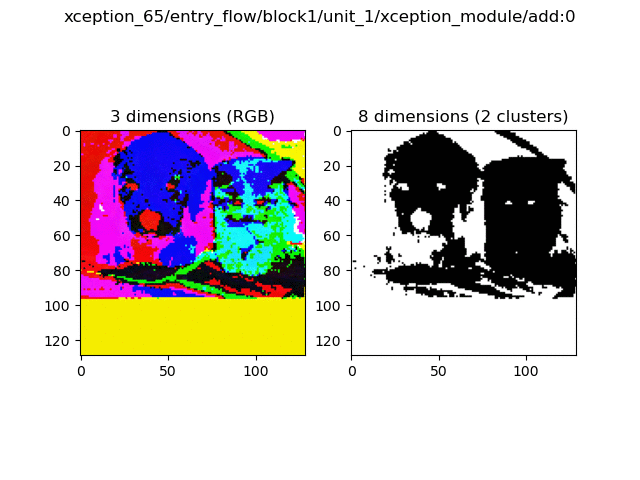

In [2]:
from IPython.display import Image
Image(open('inuToNeko.gif','rb').read())

We can notice from early stages of the algorithm that not only have our subjects been extracted from the entire image in the shape presented on the final output, but also that in many stages we can see the kitten being mostly mostly cyan, with the dog being mostly green. When studying these colours we should keep in mind the following colour graph, if one wants to understand better what is going on.
![](colourPallete.jpg)